In [128]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels
import scipy
import time

In [129]:
#Problem1

In [130]:
data1 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/problem1.csv')

In [131]:
#part A: Calculate the Mean, Variance, Skewness and Kurtosis

In [132]:
data1_mean = data1['X'].mean()
data1_variance = data1['X'].var()
data1_skewness = data1['X'].skew()
data1_kurtosis = data1['X'].kurt()-3
print("For Problem1, mean is", data1_mean, "\nvariance is", data1_variance, "\nskewness is", data1_skewness, "\nkurtosis is", data1_kurtosis)

For Problem1, mean is 0.05019795790476916 
variance is 0.010332476407479588 
skewness is 0.1206257259522635 
kurtosis is -2.7699301868297135


In [133]:
#part C: Fit both distributions

In [134]:
data1_x = data1['X']

norm_params = stats.norm.fit(data1_x)

t_params = stats.t.fit(data1_x)

ks_norm = stats.kstest(data1_x, 'norm', args=norm_params)
ks_t = stats.kstest(data1_x, 't', args=t_params)

print(f"Kolmogorov-Smirnov test for Normal Distribution: {ks_norm}")
print(f"\nKolmogorov-Smirnov test for T-Distribution: {ks_t}")

log_likelihood_norm = np.sum(stats.norm.logpdf(data1_x, *norm_params))
log_likelihood_t = np.sum(stats.t.logpdf(data1_x, *t_params))

aic_norm = 2 * 2 - 2 * log_likelihood_norm 
aic_t = 2 * 3 - 2 * log_likelihood_t  

print(f"\nAIC for Normal Distribution: {aic_norm}")
print(f"AIC for T-Distribution: {aic_t}")

if aic_norm < aic_t:
    print("\nNormal Distribution is preferred based on AIC.")
else:
    print("\nT-Distribution is preferred based on AIC.")

Kolmogorov-Smirnov test for Normal Distribution: KstestResult(statistic=np.float64(0.01275165971875869), pvalue=np.float64(0.9962422791034079), statistic_location=np.float64(0.1931202657983203), statistic_sign=np.int8(1))

Kolmogorov-Smirnov test for T-Distribution: KstestResult(statistic=np.float64(0.012697924916462489), pvalue=np.float64(0.9964533691214174), statistic_location=np.float64(-0.0377745593740776), statistic_sign=np.int8(1))

AIC for Normal Distribution: -1731.586728836508
AIC for T-Distribution: -1731.4183689195256

Normal Distribution is preferred based on AIC.


In [135]:
#Problem2

In [136]:
data2 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/problem2.csv')

In [137]:
# Part A: Calculate the pairwise covariance matrix
data2_cov = data2.cov()
data2_cov

,x1,x2,x3,x4,x5
x1,1.470484,1.454214,0.877269,1.903226,1.444361
x2,1.454214,1.252078,0.539548,1.621918,1.237877
x3,0.877269,0.539548,1.272425,1.171959,1.091912
x4,1.903226,1.621918,1.171959,1.814469,1.589729
x5,1.444361,1.237877,1.091912,1.589729,1.396186


In [138]:
#Part B: Check if the matrix is positive semi-definite
data2_eigenvalues = np.linalg.eigvals(data2_cov)
print("eigenvalues: ",data2_eigenvalues)
is_psd = np.all(data2_eigenvalues >= 0)
if is_psd == True:
    print("The pairwise covariance matrix is positive semi-definite.")
else:
    print("The pairwise covariance matrix is not positive semi-definite.")

eigenvalues:  [ 6.78670573  0.83443367 -0.31024286  0.02797828 -0.13323183]
The pairwise covariance matrix is not positive semi-definite.


In [139]:
#Part C:Find nearest positive semi-definite matrix
def higham_psd(matrix, tol=1e-9, max_iter=100):
    near_psd = matrix.copy()
    for _ in range(max_iter):
        eigvals, eigvecs = np.linalg.eigh(near_psd)
        eigvals = np.maximum(eigvals, tol)
        near_psd = eigvecs @ np.diag(eigvals) @ eigvecs.T
        if np.all(np.linalg.eigvals(near_psd) >= 0):
            break
    return near_psd

def rebonato_jackel_psd(matrix):
    eigvals, eigvecs = np.linalg.eigh(matrix)
    eigvals[eigvals < 0] = 0  
    return eigvecs @ np.diag(eigvals) @ eigvecs.T


higham_matrix = higham_psd(data2_cov)
rebonato_jackel_matrix = rebonato_jackel_psd(data2_cov)

print("Nearest PSD Matrix using Higham’s Method:")
print(higham_matrix)
print("\nNearest PSD Matrix using Rebonato & Jäckel’s Method:")
print(rebonato_jackel_matrix)

Nearest PSD Matrix using Higham’s Method:
[[1.61513295 1.44196041 0.89714421 1.78042572 1.43379434]
 [1.44196041 1.34696791 0.58508635 1.55455193 1.21140918]
 [0.89714421 0.58508635 1.29891578 1.11595578 1.07669234]
 [1.78042572 1.55455193 1.11595578 1.98316488 1.62137332]
 [1.43379434 1.21140918 1.07669234 1.62137332 1.40493616]]

Nearest PSD Matrix using Rebonato & Jäckel’s Method:
[[1.61513295 1.44196041 0.89714421 1.78042572 1.43379434]
 [1.44196041 1.34696791 0.58508635 1.55455193 1.21140918]
 [0.89714421 0.58508635 1.29891578 1.11595578 1.07669234]
 [1.78042572 1.55455193 1.11595578 1.98316488 1.62137332]
 [1.43379434 1.21140918 1.07669234 1.62137332 1.40493616]]


In [140]:
# Part D: Calculate covariance matrix using only overlapping data
data2_overlap = data2.dropna().cov()
data2_overlap

,x1,x2,x3,x4,x5
x1,0.418604,0.394054,0.424457,0.416382,0.434287
x2,0.394054,0.396786,0.409343,0.398401,0.422631
x3,0.424457,0.409343,0.441360,0.428441,0.448957
x4,0.416382,0.398401,0.428441,0.437274,0.440167
x5,0.434287,0.422631,0.448957,0.440167,0.466272


In [141]:
#Problem3

In [142]:
data3 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/problem3.csv')

In [143]:
#Part A: Fit a Multivariate Normal Distribution
data3_x1_x2 = data3[['x1', 'x2']]

data3_mean = np.mean(data3_x1_x2, axis=0)
data3_cov = np.cov(data3_x1_x2, rowvar=False)
data3_mvn = stats.multivariate_normal(mean=data3_mean, cov=data3_cov)
data3_mvn
print("Mean:")
print(data3_mvn.mean)
print("Covariance Matrix:")
print(data3_mvn.cov)

Mean:
[0.04600157 0.09991502]
Covariance Matrix:
[[0.0101622  0.00492354]
 [0.00492354 0.02028441]]


In [144]:
# Part B: Conditional Distribution 

mu_x1, mu_x2 = data3_mean.iloc[0], data3_mean.iloc[1]
sigma_x11, sigma_x12 = data3_cov[0, 0], data3_cov[0, 1]
sigma_x21, sigma_x22 = data3_cov[1, 0], data3_cov[1, 1]

# Conditional mean and variance (Analytical Formula approach)
mu_cond = mu_x2 + (sigma_x21 / sigma_x11) * (0.6 - mu_x1)
sigma_cond = sigma_x22 - (sigma_x21**2 / sigma_x11)

print(f"\n[Analytical Formula] Conditional Mean of X2 | X1=0.6: {mu_cond}")
print(f"[Analytical Formula] Conditional Variance of X2 | X1=0.6: {sigma_cond}")

# Conditional Distribution (Regression Approach)
beta = sigma_x21 / sigma_x11
mu_regression = mu_x2 + beta * (0.6 - mu_x1)
residual_variance = sigma_x22 - beta * sigma_x21

print(f"\n[Regression] Conditional Mean of X2 | X1 = 0.6: {mu_regression}")
print(f"[Regression] Conditional Variance of X2 | X1 = 0.6: {residual_variance}")


[Analytical Formula] Conditional Mean of X2 | X1=0.6: 0.3683249958609775
[Analytical Formula] Conditional Variance of X2 | X1=0.6: 0.017898969645087522

[Regression] Conditional Mean of X2 | X1 = 0.6: 0.3683249958609775
[Regression] Conditional Variance of X2 | X1 = 0.6: 0.017898969645087522


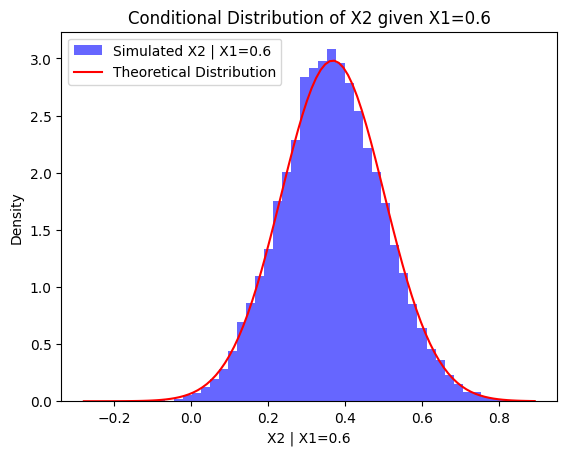

In [145]:
# Part C: Simulation using Cholesky Decomposition

L = np.linalg.cholesky(data3_cov)
Z1 = (0.6 - mu_x1) / L[0, 0]
num_samples = 10000
Z2_samples = np.random.randn(num_samples)
X2_samples = L[1, 0] * Z1 + L[1, 1] * Z2_samples + mu_x2

plt.hist(X2_samples, bins=50, density=True, alpha=0.6, color='b', label="Simulated X2 | X1=0.6")

x_vals = np.linspace(min(X2_samples), max(X2_samples), 100)
pdf_vals = stats.norm.pdf(x_vals, loc=mu_cond, scale=np.sqrt(sigma_cond))
plt.plot(x_vals, pdf_vals, 'r-', label="Theoretical Distribution")

plt.xlabel("X2 | X1=0.6")
plt.ylabel("Density")
plt.title("Conditional Distribution of X2 given X1=0.6")
plt.legend()
plt.show()


In [146]:
#Problem4

In [147]:
data4 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/problem4.csv')

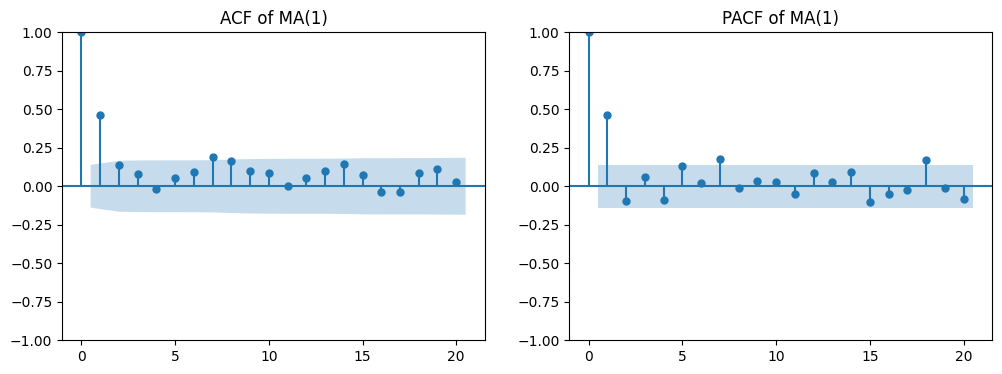

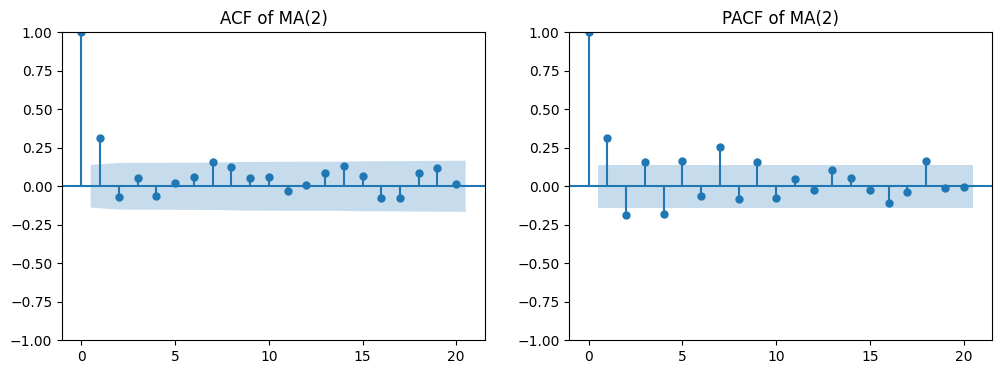

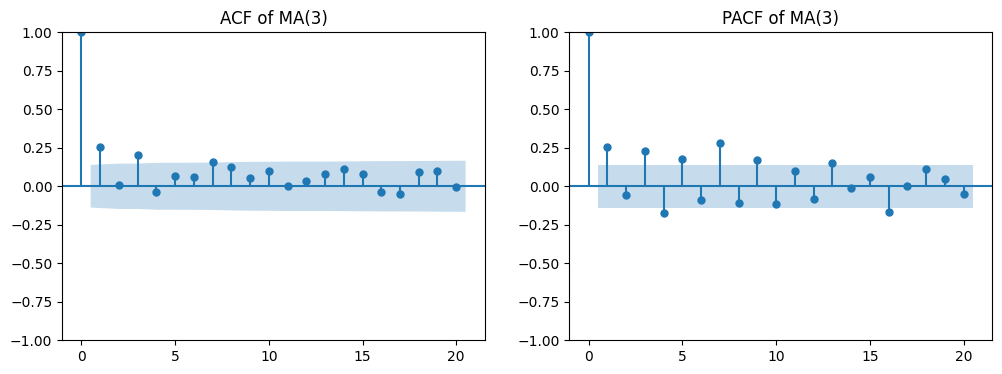

In [151]:
#Part A: Simulate MA(1),MA(2), MA(3) processes
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def simulate_process(ar_params=None, ma_params=None, n=200, seed=0):
    np.random.seed(seed)
    ar = np.r_[1, -np.array(ar_params)] if ar_params else np.r_[1]
    ma = np.r_[1, np.array(ma_params)] if ma_params else np.r_[1]
    return ArmaProcess(ar, ma).generate_sample(nsample=n)

def plot_acf_pacf(data, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(data, ax=axes[0], lags=20)
    plot_pacf(data, ax=axes[1], lags=20)
    axes[0].set_title(f'ACF of {title}')
    axes[1].set_title(f'PACF of {title}')
    plt.show()

ma1 = simulate_process(ma_params=[0.5])
ma2 = simulate_process(ma_params=[0.5, -0.3])
ma3 = simulate_process(ma_params=[0.5, -0.3, 0.2])

plot_acf_pacf(ma1, 'MA(1)')
plot_acf_pacf(ma2, 'MA(2)')
plot_acf_pacf(ma3, 'MA(3)')


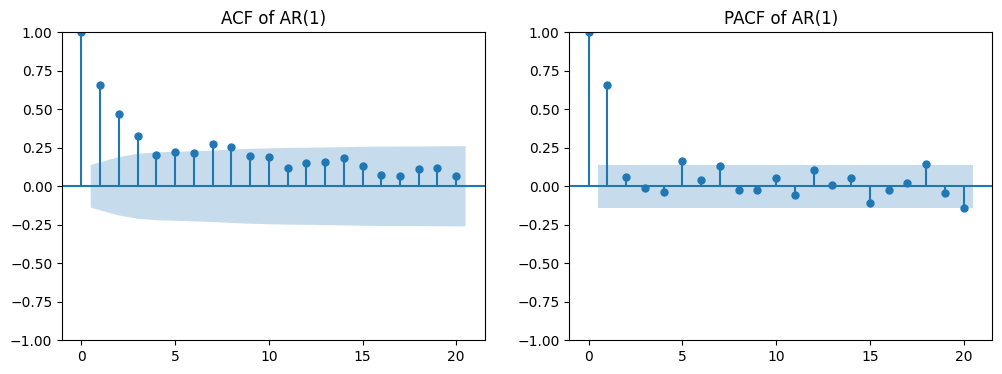

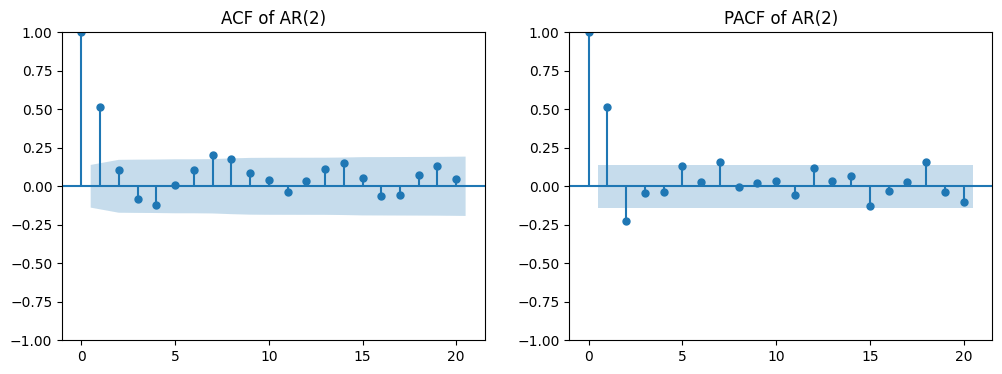

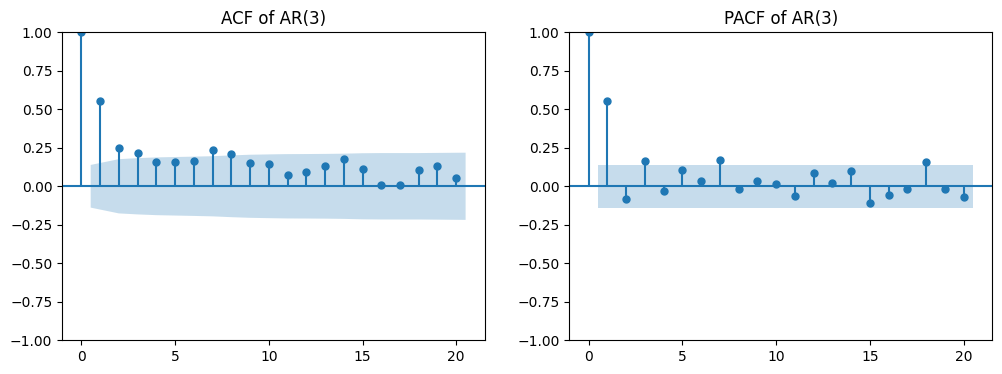

In [152]:
# Part B: Simulate AR(1), AR(2), AR(3) processes
ar1 = simulate_process(ar_params=[0.6])
ar2 = simulate_process(ar_params=[0.6, -0.3])
ar3 = simulate_process(ar_params=[0.6, -0.3, 0.2])

plot_acf_pacf(ar1, 'AR(1)')
plot_acf_pacf(ar2, 'AR(2)')
plot_acf_pacf(ar3, 'AR(3)')

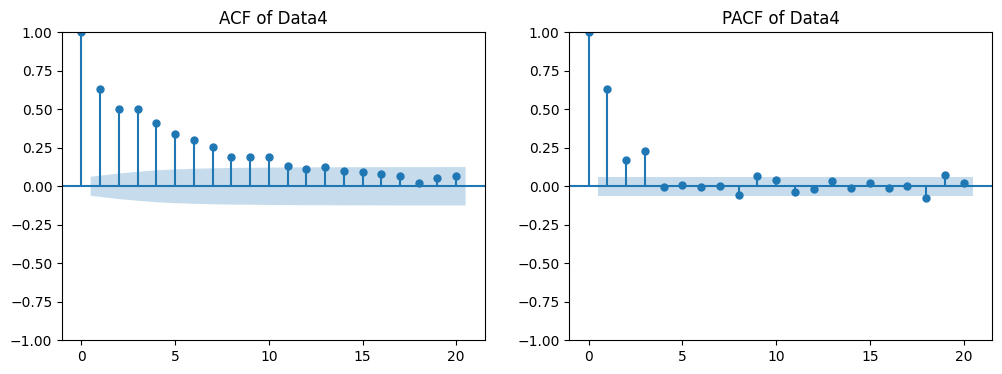

In [153]:
#C: Examine data4 to choose AR/MA process
plot_acf_pacf(data4, "Data4")

In [154]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity check
result = adfuller(data4)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")

ADF Statistic: -8.493620792887016
p-value: 1.2934437199813811e-13
Critical Values: {'1%': np.float64(-3.4369259442540416), '5%': np.float64(-2.8644432969122833), '10%': np.float64(-2.5683158550174094)}
The data is stationary.


In [155]:
#Part D: Fit AR(3) model and Compare AICc
from statsmodels.tsa.arima.model import ARIMA
def calculate_aicc(model):
    aic = model.aic
    n = model.nobs
    k = len(model.params)  
    aicc = aic + (2 * k * (k + 1)) / max(n - k - 1, 1) 
    return aicc

models = {
    "AR(1)": ARIMA(data4, order=(1, 0, 0)).fit(),
    "AR(2)": ARIMA(data4, order=(2, 0, 0)).fit(),
    "AR(3)": ARIMA(data4, order=(3, 0, 0)).fit(),
    "AR(4)": ARIMA(data4, order=(4, 0, 0)).fit(),
    "AR(5)": ARIMA(data4, order=(5, 0, 0)).fit(),
    "MA(1)": ARIMA(data4, order=(0, 0, 1)).fit(),
    "MA(2)": ARIMA(data4, order=(0, 0, 2)).fit(),
    "MA(3)": ARIMA(data4, order=(0, 0, 3)).fit(),
    "ARMA(1,1)": ARIMA(data4, order=(1, 0, 1)).fit(),
    "ARMA(2,1)": ARIMA(data4, order=(2, 0, 1)).fit(),
    "ARMA(3,1)": ARIMA(data4, order=(3, 0, 1)).fit(),
    "ARMA(2,2)": ARIMA(data4, order=(2, 0, 2)).fit(),
    "ARMA(3,2)": ARIMA(data4, order=(3, 0, 2)).fit()
}

aicc_values = {name: calculate_aicc(model) for name, model in models.items()}
best_model = min(aicc_values, key=aicc_values.get)

print("AICc values for different models:")
for model, aicc in sorted(aicc_values.items(), key=lambda x: x[1]):
    print(f"{model}: {aicc:.2f}")

print(f"\nBest fitting model: {best_model} with AICc = {aicc_values[best_model]:.2f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AICc values for different models:
AR(3): -1746.22
ARMA(3,1): -1744.23
AR(4): -1744.22
ARMA(3,2): -1742.26
AR(5): -1742.25
ARMA(2,2): -1739.96
ARMA(2,1): -1725.41
ARMA(1,1): -1723.41
AR(2): -1696.05
AR(1): -1669.07
MA(3): -1645.07
MA(2): -1559.21
MA(1): -1508.90

Best fitting model: AR(3) with AICc = -1746.22


In [156]:
#Problem5

In [157]:
#data5 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/DailyReturn.csv')
data5 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/DailyReturn.csv', parse_dates=["Date"], index_col="Date")  
returns = data5.values

In [158]:
#Part A: calculate an exponentially weighted covariance matrix
def ewma_cov_matrix(data, lambda_val):
    returns = data.iloc[:, 1:].values
    T, N = returns.shape

    weights = np.array([(1 - lambda_val) * lambda_val ** i for i in range(T)][::-1])
    mean_returns = np.average(returns, axis=0, weights=weights)
    deviations = returns - mean_returns
    weighted_deviations = deviations * np.sqrt(weights[:, np.newaxis])
    ewma_cov = np.dot(weighted_deviations.T, weighted_deviations)
    return ewma_cov

In [159]:
# Verify the routine
def ewma_cov_pandas(data, lambda_val):
    span = 2 / (1 - lambda_val) - 1  
    ewma_cov = data.iloc[:, 1:].ewm(span=span, adjust=False).cov(pairwise=True).iloc[-data.shape[1]+1:]
    ewma_cov_matrix = ewma_cov.unstack().iloc[-data.shape[1]+1:].values.reshape(data.shape[1]-1, data.shape[1]-1)
    return ewma_cov_matrix
    
lambda_test = 0.94
 
ewma_manual = ewma_cov_matrix(data5, lambda_test)
print("Manual EWMA Covariance Matrix:\n", ewma_manual)
ewma_pandas = ewma_cov_pandas(data5, lambda_test)
print("\nPandas EWMA Covariance Matrix:\n", ewma_pandas)

error = np.abs(ewma_manual - ewma_pandas).mean()
print("\nMean Absolute Error between manual and Pandas EWMA covariance",error)

Manual EWMA Covariance Matrix:
 [[ 1.38773153e-04 -2.07928163e-06  8.60182115e-05 ...  8.08341038e-05
   5.89540072e-05  3.87773331e-05]
 [-2.07928163e-06  5.72367208e-04  1.07296400e-04 ...  3.76716661e-05
   2.47231926e-04  8.07845344e-05]
 [ 8.60182115e-05  1.07296400e-04  1.50577614e-04 ...  7.45132602e-05
   1.42691964e-04  7.10351155e-05]
 ...
 [ 8.08341038e-05  3.76716661e-05  7.45132602e-05 ...  2.53849570e-04
   1.37564641e-04  9.78001838e-05]
 [ 5.89540072e-05  2.47231926e-04  1.42691964e-04 ...  1.37564641e-04
   6.41327036e-04  1.09131803e-04]
 [ 3.87773331e-05  8.07845344e-05  7.10351155e-05 ...  9.78001838e-05
   1.09131803e-04  1.45760988e-04]]

Pandas EWMA Covariance Matrix:
 [[ 1.43202083e-04  3.77976962e-05  2.22125996e-05 ...  3.66049156e-05
   3.93741639e-05 -1.92835938e-06]
 [-2.14564168e-06  6.38189586e-05  2.20538527e-05 ...  9.33568165e-05
   1.97621883e-05  1.53624735e-05]
 [ 8.87634736e-05  4.03785205e-05  1.61339187e-05 ...  7.44276882e-05
   7.85684582e-05 -

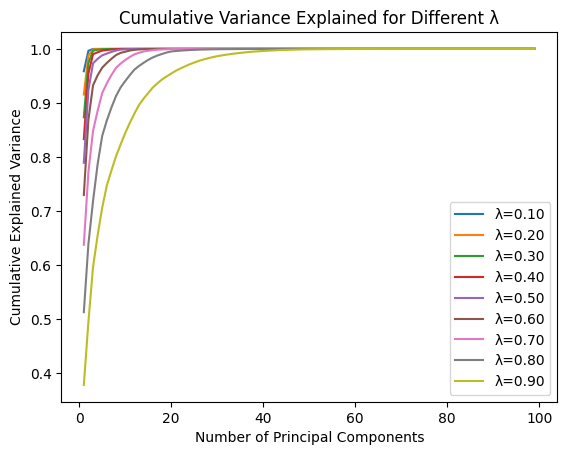

In [160]:
#Part B: Use PCA and plot the cumulative variance with different values of lambda
def pca_numpy(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    return cumulative_explained_variance

np.random.seed(42)  
lambda_values = np.linspace(0, 1, 10, endpoint=False)[1:]   
explained_variance_ratios = []  

for lambda_val in lambda_values:
    ewma_cov = ewma_cov_matrix(data5, lambda_val) 
    cumulative_explained_variance = pca_numpy(ewma_cov) 
    explained_variance_ratios.append(cumulative_explained_variance)  


for i in range(len(lambda_values)):
    lambda_val = lambda_values[i]
    plt.plot(range(1, len(explained_variance_ratios[i]) + 1), explained_variance_ratios[i], label=f"λ={lambda_val:.2f}")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained for Different λ")
plt.legend()
plt.show()

In [161]:
#Problem6

In [162]:
data6 = pd.read_csv('/Users/yuchen/Desktop/FINTECH545/project01/problem6.csv')

In [163]:
#Part A: Simulate 10000 draws using the Cholesky Root method
eigvals_input = np.linalg.eigvalsh(data6)
if np.any(eigvals_input <= 0):
    print("Covariance matrix is not positive definite.")

def cholesky_simulation(data6, n_samples=10000, epsilon=1e-6):
    np.random.seed(42)
    L = np.linalg.cholesky(data6 + np.eye(data6.shape[0]) * epsilon)  # Ensure positive definiteness
    z = np.random.normal(size=(data6.shape[0], n_samples))
    return L @ z
cholesky_samples = cholesky_simulation(data6)
cholesky_samples

Covariance matrix is not positive definite.


array([[ 0.03621673, -0.01008121,  0.04722467, ..., -0.0514265 ,
         0.03614757,  0.04698406],
       [-0.02711125, -0.01327327, -0.02325044, ...,  0.01385646,
         0.07362495, -0.06632391],
       [ 0.01681887,  0.02019737, -0.07359091, ..., -0.02610066,
        -0.13131827, -0.02756533],
       ...,
       [ 0.10649973,  0.00221888, -0.02444146, ..., -0.02126386,
         0.02097008,  0.04094775],
       [ 0.10086256, -0.06498925, -0.01422733, ...,  0.07864218,
         0.13312361, -0.00410319],
       [-0.0217295 ,  0.00361992, -0.03766752, ...,  0.02571732,
         0.06879675, -0.03136218]], shape=(500, 10000))

In [164]:
#Part B: Simulate 10000 draws using PCA
def pca_simulation(data6, variance_threshold=0.75, n_samples=10000):
    np.random.seed(42)
    eigvals, eigvecs = np.linalg.eigh(data6)
    eigvals = eigvals[::-1]  
    eigvecs = eigvecs[:, ::-1]
    
    cum_variance = np.cumsum(eigvals) / np.sum(eigvals)
    num_components = np.searchsorted(cum_variance, variance_threshold) + 1
    
    reduced_eigvecs = eigvecs[:, :num_components]
    reduced_eigvals = np.diag(np.sqrt(eigvals[:num_components]))
    z = np.random.normal(size=(num_components, n_samples))
    return reduced_eigvecs @ reduced_eigvals @ z
pca_samples = pca_simulation(data6)
pca_samples 

array([[ 0.02697585, -0.09144258,  0.05281014, ...,  0.0898822 ,
        -0.03135391,  0.06659652],
       [-0.00319415,  0.04444234, -0.06837276, ..., -0.00151892,
        -0.01338989, -0.01553911],
       [-0.04891228, -0.05017948, -0.06606618, ...,  0.1148471 ,
        -0.01026722,  0.06154846],
       ...,
       [-0.02915892, -0.04452223, -0.00116936, ...,  0.00864026,
        -0.00392733, -0.02307916],
       [ 0.04572002, -0.01053006, -0.034926  , ...,  0.03000636,
        -0.05388574,  0.04996218],
       [ 0.00183123,  0.00529478, -0.00317145, ..., -0.01533678,
        -0.02225911, -0.04163302]], shape=(500, 10000))

In [165]:
#Part C: Compare the Frobenius norm
cov_cholesky = np.cov(cholesky_samples)
cov_pca = np.cov(pca_samples)

frobenius_cholesky = np.linalg.norm(cov_cholesky - data6, 'fro')
frobenius_pca = np.linalg.norm(cov_pca - data6, 'fro')

print("Cholesky Frobenius Norm: ",frobenius_cholesky)
print("PCA Frobenius Norm: ",frobenius_pca)

Cholesky Frobenius Norm:  0.021191270918006117
PCA Frobenius Norm:  0.08323375645414555


In [166]:
#Part D: Compare cumulative variance explained
eigvals_input = eigvals_input[::-1]  
eigvals_cholesky = np.linalg.eigvalsh(cov_cholesky)[::-1]
eigvals_pca = np.linalg.eigvalsh(cov_pca)[::-1]

cum_variance_input = np.cumsum(eigvals_input) / np.sum(eigvals_input)
cum_variance_cholesky = np.cumsum(eigvals_cholesky) / np.sum(eigvals_cholesky)
cum_variance_pca = np.cumsum(eigvals_pca) / np.sum(eigvals_pca)

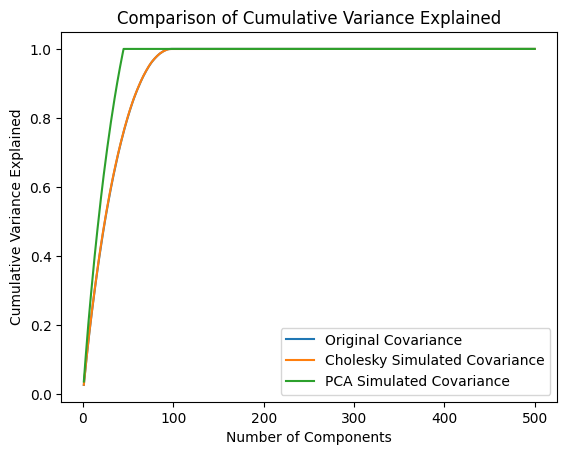

In [167]:
plt.plot(range(1, len(cum_variance_input) + 1), cum_variance_input, label="Original Covariance")
plt.plot(range(1, len(cum_variance_cholesky) + 1), cum_variance_cholesky, label="Cholesky Simulated Covariance")
plt.plot(range(1, len(cum_variance_pca) + 1), cum_variance_pca, label="PCA Simulated Covariance")

plt.xlabel("Number of Components")  
plt.ylabel("Cumulative Variance Explained")
plt.title("Comparison of Cumulative Variance Explained")
plt.legend()
plt.show()

In [168]:
# Compute maximum absolute deviation
max_dev_cholesky = np.max(np.abs(cum_variance_cholesky - cum_variance_input))
max_dev_pca = np.max(np.abs(cum_variance_pca - cum_variance_input))

# Compute MSE
mse_cholesky = np.mean((cum_variance_cholesky - cum_variance_input) ** 2)
mse_pca = np.mean((cum_variance_pca - cum_variance_input) ** 2)

print("Max Deviation (Cholesky): ",max_dev_cholesky)
print("Max Deviation (PCA): ",max_dev_pca)
print("MSE (Cholesky): ",mse_cholesky)
print("MSE (PCA): ",mse_pca)



Max Deviation (Cholesky):  0.003517809112811743
Max Deviation (PCA):  0.24098398688211042
MSE (Cholesky):  5.34979444558402e-07
MSE (PCA):  0.003418184525058695


In [169]:
#Part E: Compare runtime
start_cholesky = time.time()
cholesky_samples = cholesky_simulation(data6)
time_cholesky = time.time() - start_cholesky

start_pca = time.time()
pca_samples = pca_simulation(data6)
time_pca = time.time() - start_pca

print("Cholesky simulation time:", time_cholesky)
print("PCA simulation time:", time_pca)


Cholesky simulation time: 0.10916471481323242
PCA simulation time: 0.025751113891601562
